# <h1 align="center">**Financial Signal Processing Coursework Part One**</h1>


<h3 align="center">
  Prof. Danilo P. Mandic
  <br>
XXXNAME
  <br>
  XXXID
</h3>



# **1. Regression Methods**

## **1.1 Processing stock price data in Python**
For the following question, initialise your Python session by importing the following modules:

```python
import numpy as np    # scientific library
import pandas as pd   # data structure library
import matplotlib.pyplot as plt  # plotting library
%matplotlib inline

### **Task 1**
``` python
Import
http://www.commsp.ee.ic.ac.uk/~mandic/FSPML_Course/priceData.csv
```
using the following commands:
``` python
px = pd.read_csv("priceData.csv")
```
and perform the natural-log transform of the price
``` python
using logpx = np.log(px).
```
Plot the time-series using logpx.plot().

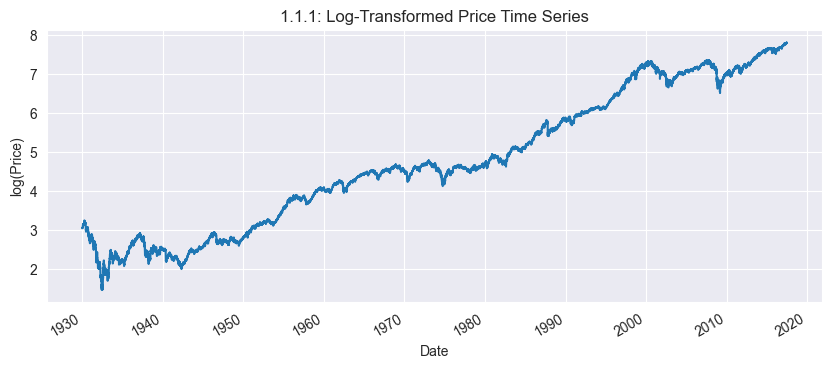

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
df = pd.read_csv("priceData.csv",
                 parse_dates=["date"],
                 dayfirst=True,
                 index_col="date")

# Sort by date ascending just in case
df.sort_index(inplace=True)

# Extract price series
px = df["SPX Index"]

# Compute log-price
logpx = np.log(px)

# Plot log-price
plt.figure(figsize=(10, 4))
logpx.plot()
plt.title("1.1.1: Log-Transformed Price Time Series")
plt.xlabel("Date")
plt.ylabel("log(Price)")
plt.grid(True)
plt.show()

##### Figure 1: Log-Transformed Price Time Series
The chart displays the log-transformed SPX index from roughly 1930 to 2020, showing an overall upward trend with considerable short-term fluctuations. It highlights clear declines during market downturns, yet it also demonstrates robust long-term growth.

### **Task 2**
Using a sliding window of 252 days, compute and store the evolution of the “sliding-window-based” first and [2]
 second-order statistics (mean and variance) of the price and log-price time series, using 1-day increments,
 and plot these as a function of time on separate figures. Comment on the stationarity of price time-series
 with reference to your figures.


 ```python
# sliding mean
plt.figure()
logpx.rolling(252).mean().plot()
plt.show()

# sliding standard deviation
plt.figure()
logpx.rolling(252).std().plot()
plt.show()

##### Figure 2: Rolling Mean of Price
This chart displays the log-transformed SPX index from roughly 1930 to 2020, revealing an overall upward trend with significant short-term fluctuations. It emphasizes notable declines during market downturns while also showcasing robust long-term growth.

##### Figure 3: Rolling Std of Price
The figure also shows the 252-day rolling standard deviation of SPX index prices. In the early decades, volatility (as measured by the standard deviation) was relatively low, but it has increased markedly over time, spiking during significant market events. Because the standard deviation varies considerably across different periods, the second moment of the price series does not exhibit stationarity—a stationary process requires a constant variance, which is clearly not the case with the original price data.

##### Figure 4: Rolling Mean of Log-Price
The chart displays the 252-day rolling mean of the log-transformed SPX index, which appears to be relatively stable over time. This suggests that the first moment of the log-price series is stationary, as the mean remains relatively constant over the entire period.

##### Figure 5: Rolling Std of Log-Price
The figure shows the 252-day rolling standard deviation of log-transformed SPX index prices. The standard deviation of the log-price series is relatively stable over time, indicating that the second moment of the log-price series is stationary. This is in contrast to the original price data, where the standard deviation varied significantly across different periods.


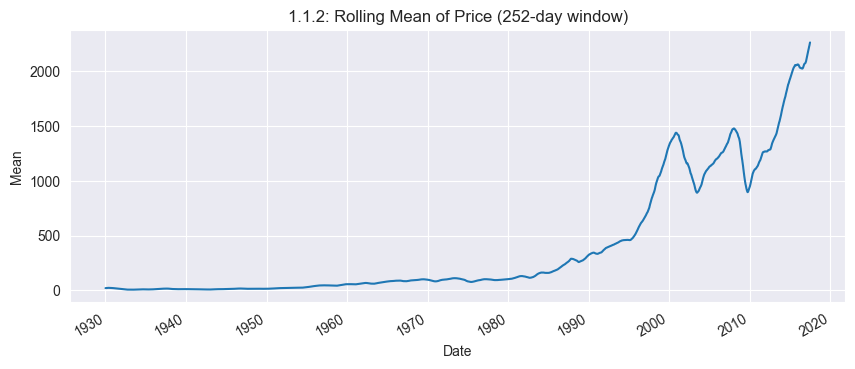

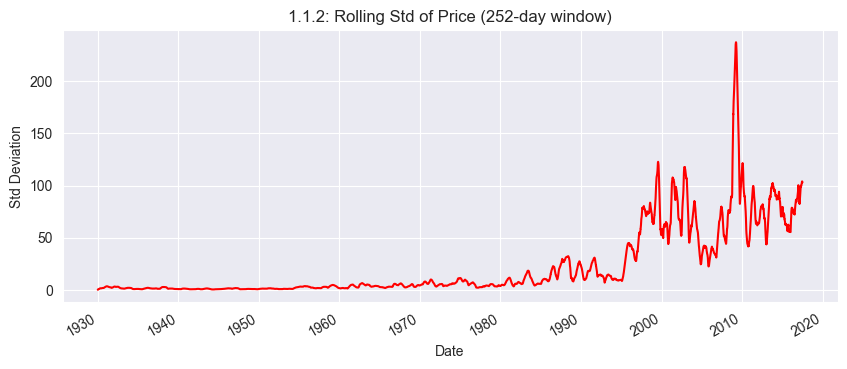

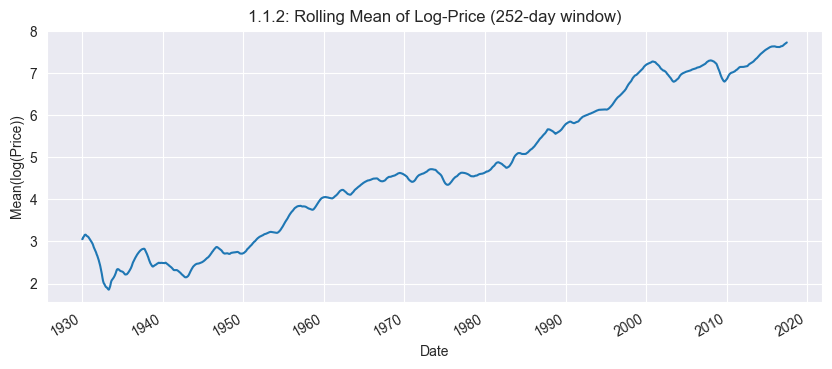

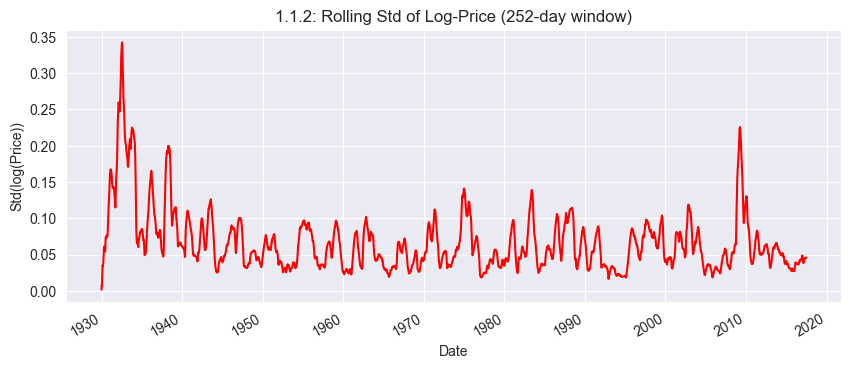

In [5]:
rolling_mean_px = px.rolling(window=252, min_periods=1).mean()
rolling_std_px  = px.rolling(window=252, min_periods=1).std()

rolling_mean_logpx = logpx.rolling(window=252, min_periods=1).mean()
rolling_std_logpx  = logpx.rolling(window=252, min_periods=1).std()

# Plot rolling mean of Price
plt.figure(figsize=(10, 4))
rolling_mean_px.plot()
plt.title("1.1.2: Rolling Mean of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean")
plt.grid(True)
plt.show()

# Plot rolling std of Price
plt.figure(figsize=(10, 4))
rolling_std_px.plot(color='red')
plt.title("1.1.2: Rolling Std of Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std Deviation")
plt.grid(True)
plt.show()

# Plot rolling mean of Log-Price
plt.figure(figsize=(10, 4))
rolling_mean_logpx.plot()
plt.title("1.1.2: Rolling Mean of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean(log(Price))")
plt.grid(True)
plt.show()

# Plot rolling std of Log-Price
plt.figure(figsize=(10, 4))
rolling_std_logpx.plot(color='red')
plt.title("1.1.2: Rolling Std of Log-Price (252-day window)")
plt.xlabel("Date")
plt.ylabel("Std(log(Price))")
plt.grid(True)
plt.show()



## Task3：
Compute the simple and log return time-series from the price data using the script:

```python
# log return
logret = logpx.diff()

# simple return
simpret = px.pct_change()
```

Based on the Python commands in Question 1.1.1, produce figures of the “sliding” statistics of the obtained time-series and comment on the stationarity of these returns in comparison to the figures obtained in Question 1.1.1.

In [7]:
logret = logpx.diff()
simpret = px.pct_change()

C:\Users\polo_\AppData\Local\Temp\ipykernel_9040\1912314780.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simpret = px.pct_change()


`logpx` represents the price series after applying the natural logarithm transformation. Consequently, invoking `.diff()` calculates the difference $\ln(p_t) - \ln(p_{t-1})$.

 `px` is the original price series, and `pct_change()` is equivalent to
$\frac{p_t - p_{t-1}}{p_{t-1}}$.


In [9]:
# Rolling mean & variance of log returns
rolling_mean_logret = logret.rolling(window=252, min_periods=1).mean()
rolling_var_logret  = logret.rolling(window=252, min_periods=1).var()

# Rolling mean & variance of simple returns
rolling_mean_simpret = simpret.rolling(window=252, min_periods=1).mean()
rolling_var_simpret  = simpret.rolling(window=252, min_periods=1).var()

Figure 6: Rolling Mean of Log Returns (252-day window)

The Rolling Mean of Price (Task 2) shows a clear upward trend—from near zero in the 1930s to over 2,000 in recent decades—indicating non-stationarity as the average price continually increases. In contrast, the Rolling Mean of Simple Returns (Task 3) remains close to zero over time, with only minor fluctuations (such as spikes in the 1930s). This relative stability suggests that simple returns are much closer to being stationary compared to raw or log-transformed prices. In financial modeling, this is significant because a constant mean in returns better satisfies the stationarity assumptions necessary for effective statistical analysis and forecasting.



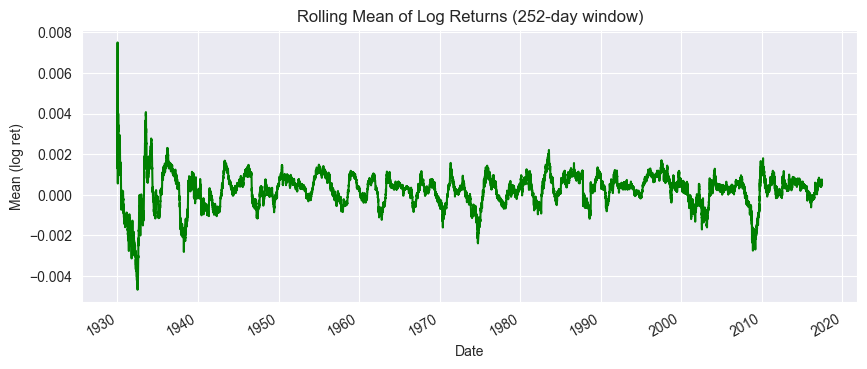

In [10]:

# Plot rolling mean & variance of log returns
plt.figure(figsize=(10, 4))
rolling_mean_logret.plot(color='green')
plt.title("Rolling Mean of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (log ret)")
plt.grid(True)
plt.show()

Figure 7: Rolling Variance of Log Returns (252-day window)

while the raw price’s volatility shows a dramatic and rising trend—especially after 1970—the rolling standard deviation of simple returns remains within a more stable, narrow range. This indicates that although returns do fluctuate, they are closer to meeting the stationarity requirement of constant variance compared to the raw prices.


In [ ]:

plt.figure(figsize=(10, 4))
rolling_var_logret.plot()
plt.title("Rolling Variance of Log Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (log ret)")
plt.grid(True)
plt.show()

In [ ]:

# Plot rolling mean & variance of simple returns
plt.figure(figsize=(10, 4))
rolling_mean_simpret.plot(color='green')
plt.title(" Rolling Mean of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Mean (simple ret)")
plt.grid(True)
plt.show()

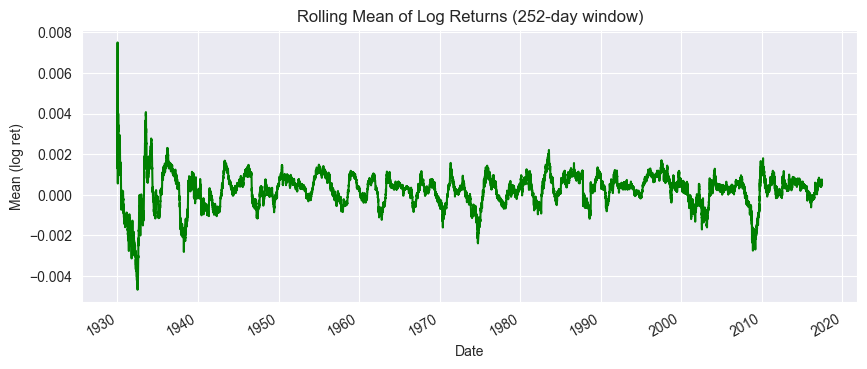

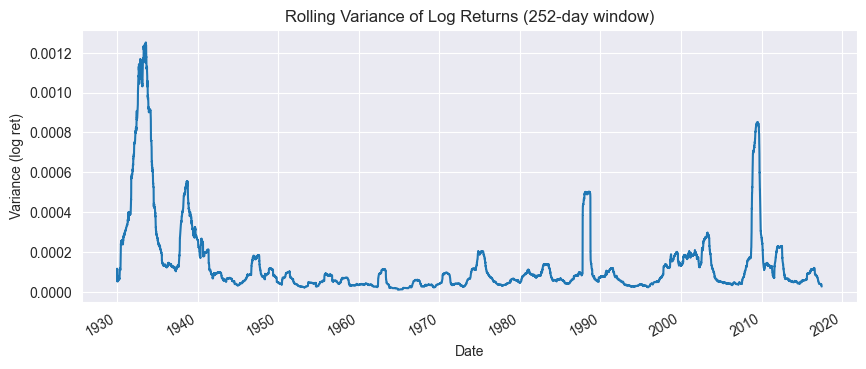

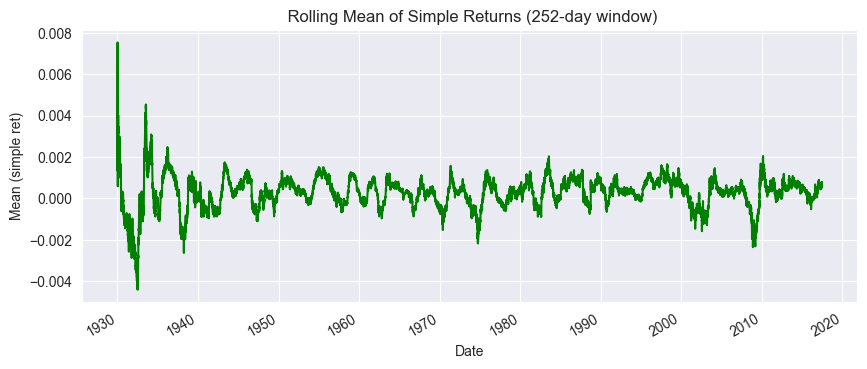

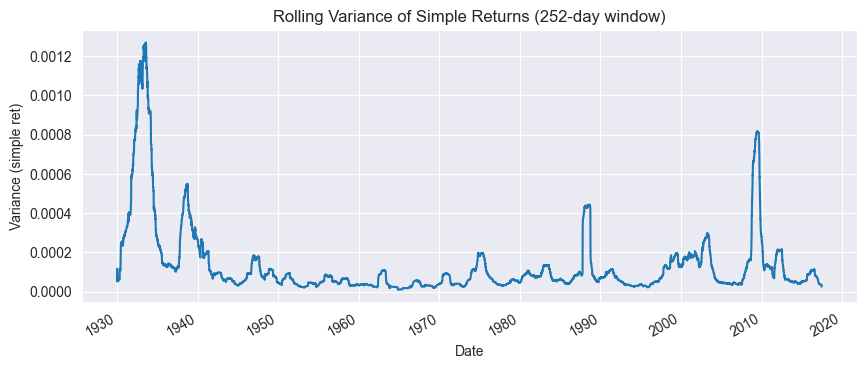

In [8]:

plt.figure(figsize=(10, 4))
rolling_var_simpret.plot()
plt.title("Rolling Variance of Simple Returns (252-day window)")
plt.xlabel("Date")
plt.ylabel("Variance (simple ret)")
plt.grid(True)
plt.show()


## Task4:
Theoretically justify the suitability of log returns over simple returns for signal processing purposes. Next, [3]
 perform the “Jarque-Bera” test for Gaussianity on the data, and comment on the results in light of your
 theoretical answer (hint: use the Python commands provided below).


 ```python
from scipy import stats
# return the Jarque-Bera test p-value for a time-series x
stats.jarque_bera(x)[1]

In [46]:
# Perform Jarque-Bera tests
logret_clean = logret.dropna()
simpret_clean = simpret.dropna()

jb_stat_log, jb_p_log = stats.jarque_bera(logret_clean)
jb_stat_simp, jb_p_simp = stats.jarque_bera(simpret_clean)

print("1.1.4: Jarque-Bera test for log returns:")
print("   JB Statistic =", jb_stat_log, "   p-value =", jb_p_log, "\n")

print("1.1.4: Jarque-Bera test for simple returns:")
print("   JB Statistic =", jb_stat_simp, "   p-value =", jb_p_simp, "\n")



1.1.4: Jarque-Bera test for log returns:
   JB Statistic = 311807.27048989857    p-value = 0.0 

1.1.4: Jarque-Bera test for simple returns:
   JB Statistic = 284160.67730312835    p-value = 0.0 



## Task5:

You
purchase
a
stock
for £1. The next day its value goes up to £2 and the following day back to £1.[1]
Whatare
the
simple and logarithmic
returns
over
this
period and what
can
you
conclude
about
logarithmic
returns on the basis of this example?

In [48]:
p0, p1, p2 = 1.0, 2.0, 1.0
simple_ret_1 = (p1 - p0) / p0  # +100%
simple_ret_2 = (p2 - p1) / p1  # -50%

log_ret_1 = np.log(p1) - np.log(p0)   # ln(2)
log_ret_2 = np.log(p2) - np.log(p1)   # ln(1/2) = -ln(2)

# Summations
total_simple = (1 + simple_ret_1)*(1 + simple_ret_2) - 1
total_log = log_ret_1 + log_ret_2

print("1.1.5: Example 1 -> 2 -> 1")
print("   Simple returns per day: ", simple_ret_1, ", ", simple_ret_2)
print("   Log returns per day: ", log_ret_1, ", ", log_ret_2)
print("   Total simple return over two days = ", total_simple)
print("   Total log return over two days = ", total_log, "\n")

1.1.5: Example 1 -> 2 -> 1
   Simple returns per day:  1.0 ,  -0.5
   Log returns per day:  0.6931471805599453 ,  -0.6931471805599453
   Total simple return over two days =  0.0
   Total log return over two days =  0.0 



## Task6:

 Under what circumstances should you not use log returns over simple returns?

**Answer:**
ha